# Analyse des Tendances de la Musique

## Intérêt
Comprendre les préférences musicales et les tendances de l'industrie musicale.

## Motivation
La musique est un domaine universel qui intéresse beaucoup de gens, et l'analyse des tendances peut aider les labels de musique et les artistes à mieux comprendre leur public.

## Description
Collecter des données de plateformes comme Spotify ou YouTube pour analyser les genres musicaux les plus populaires, la durée moyenne des chansons, et les artistes émergents.

## Outils utilisés
Python, pandas, matplotlib, API de Spotify.

In [1]:
!pip install spotipy pandas matplotlib

In [1]:
# Importer les bibliothèques nécessaires
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#login_id = 'opzidvd5xc@knmcadibav.com'
#login_secret = 'AQWqli21*Pa'
#Gender= "M"
#Birth date= 02/04/1995 
#Mame=314smmgwz43msqxjzxwzogazj2ii


In [7]:
# Authentification à l'API Spotify
client_id = 'caab9b5483b3462f8fdd2e3aabc0715b'
client_secret = '808b53973e5e49818757aceee33ea84c'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [3]:
# Fonction pour récupérer les données des morceaux d'une playlist
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [4]:
# Récupérer les playlists populaires de Spotify
def get_category_playlists(category_id, country='US', limit=10):
    playlists = sp.category_playlists(category_id=category_id, country=country, limit=limit)
    return playlists['playlists']['items']

In [5]:
# Extraire des informations pertinentes des morceaux
def extract_track_info(tracks):
    track_data = []
    for track in tracks:
        track_info = track['track']
        track_data.append({
            'name': track_info['name'],
            'artist': track_info['artists'][0]['name'],
            'album': track_info['album']['name'],
            'release_date': track_info['album']['release_date'],
            'duration_ms': track_info['duration_ms'],
            'popularity': track_info['popularity']
        })
    return track_data

In [8]:
# Récupérer les playlists populaires dans la catégorie "pop"
pop_playlists = get_category_playlists('pop')

# Extraire les données des morceaux de ces playlists
all_tracks = []
for playlist in pop_playlists:
    tracks = get_playlist_tracks('spotify', playlist['id'])
    track_data = extract_track_info(tracks)
    all_tracks.extend(track_data)

In [9]:
# Créer un DataFrame pandas
df = pd.DataFrame(all_tracks)

# Convertir la durée des morceaux de millisecondes en minutes
df['duration_min'] = df['duration_ms'] / 60000

# Afficher les premières lignes du DataFrame
df.head()

,name,artist,album,release_date,duration_ms,popularity,duration_min
0,"Good Luck, Babe!",Chappell Roan,"Good Luck, Babe!",2024-04-05,218423,91,3.640383
1,Please Please Please,Sabrina Carpenter,Please Please Please,2024-06-06,186365,95,3.106083
2,BIRDS OF A FEATHER,Billie Eilish,HIT ME HARD AND SOFT,2024-05-17,210373,96,3.506217
3,Too Sweet,Hozier,Unheard,2024-03-22,251424,82,4.190400
4,I Had Some Help (Feat. Morgan Wallen),Post Malone,I Had Some Help,2024-05-10,178205,94,2.970083


In [13]:
df.info


<bound method DataFrame.info of                                       name               artist  \
0                         Good Luck, Babe!        Chappell Roan   
1                     Please Please Please    Sabrina Carpenter   
2                       BIRDS OF A FEATHER        Billie Eilish   
3                                Too Sweet               Hozier   
4    I Had Some Help (Feat. Morgan Wallen)          Post Malone   
..                                     ...                  ...   
929                                  Karma         Taylor Swift   
930                             Youngblood  5 Seconds of Summer   
931                                 Ritual               Tiësto   
932                        OK Not To Be OK           Marshmello   
933                     Little Bit of Love          Tom Grennan   

                       album release_date  duration_ms  popularity  \
0           Good Luck, Babe!   2024-04-05       218423          91   
1       Please Please P

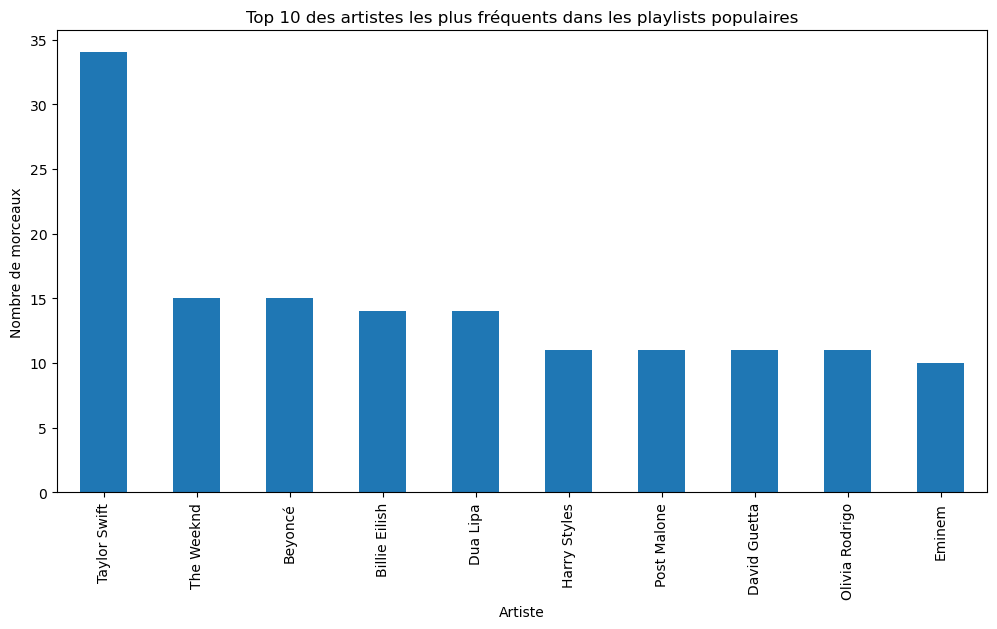

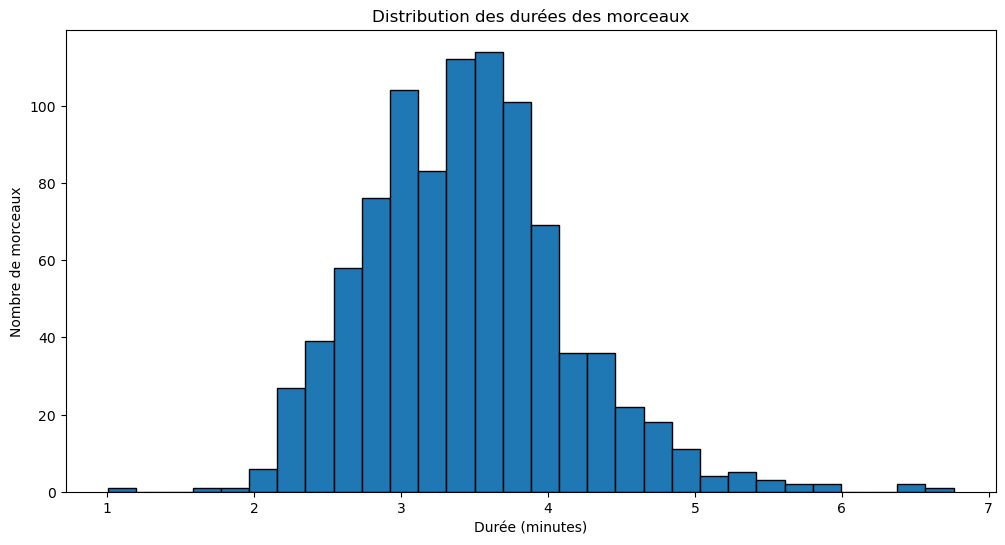

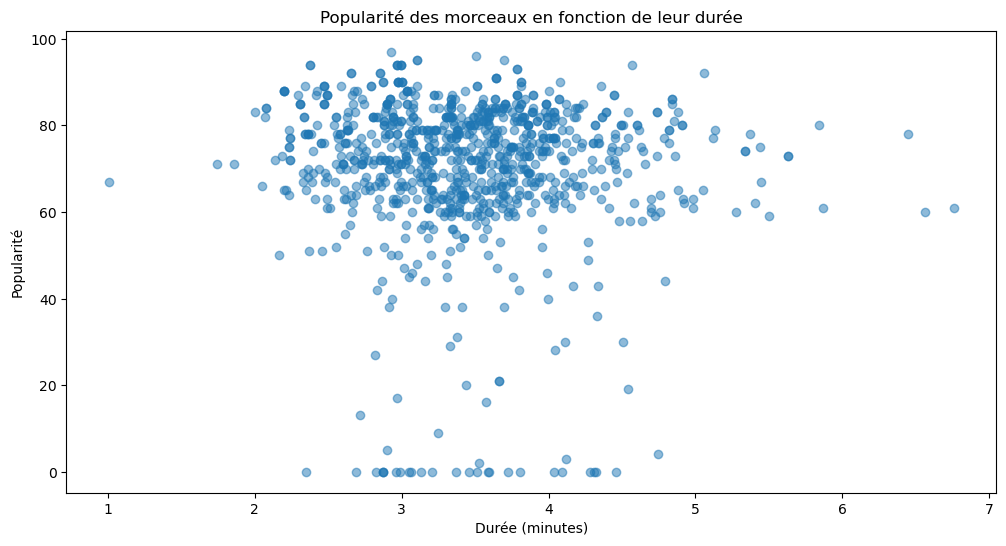

In [10]:
# Analyse et visualisation des données
# Histogramme des genres musicaux
plt.figure(figsize=(12, 6))
df['artist'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 des artistes les plus fréquents dans les playlists populaires')
plt.xlabel('Artiste')
plt.ylabel('Nombre de morceaux')
plt.show()

# Durée moyenne des morceaux
plt.figure(figsize=(12, 6))
plt.hist(df['duration_min'], bins=30, edgecolor='k')
plt.title('Distribution des durées des morceaux')
plt.xlabel('Durée (minutes)')
plt.ylabel('Nombre de morceaux')
plt.show()

# Popularité des morceaux
plt.figure(figsize=(12, 6))
plt.scatter(df['duration_min'], df['popularity'], alpha=0.5)
plt.title('Popularité des morceaux en fonction de leur durée')
plt.xlabel('Durée (minutes)')
plt.ylabel('Popularité')
plt.show()